In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show,output_notebook
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Lecture du Dataset

In [7]:
data=pd.read_csv("iris.csv")


In [8]:
data

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,FLOWER
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Visualisation

In [9]:
data.dtypes

SEPAL_LENGTH    float64
SEPAL_WIDTH     float64
PETAL_LENGTH    float64
PETAL_WIDTH     float64
FLOWER           object
dtype: object

In [10]:
data.shape

(150, 5)

In [11]:
data.describe()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data.FLOWER.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: FLOWER, dtype: int64

<AxesSubplot:>

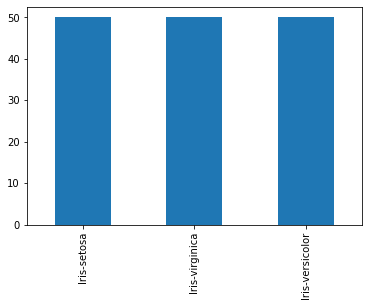

In [14]:
data.FLOWER.value_counts().plot(kind="bar")

In [15]:
serie = data.isnull().sum(axis=0)
serie

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
FLOWER          0
dtype: int64

In [16]:
data.head(10)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,FLOWER
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


C:\Users\theop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


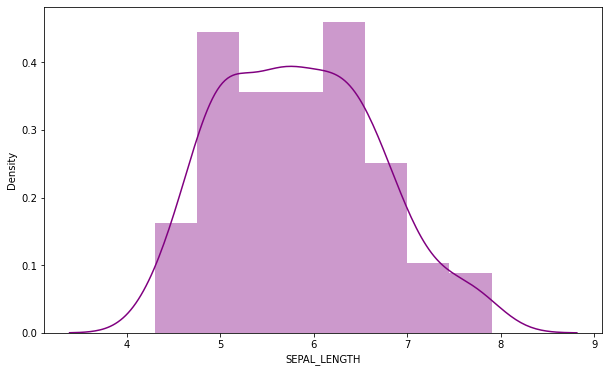

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data['SEPAL_LENGTH'],color='purple')
plt.show()

Text(0, 0.5, 'Petal Width')

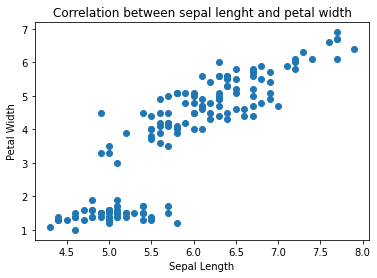

In [18]:
plt.scatter(data['SEPAL_LENGTH'],data['PETAL_LENGTH'])
plt.title("Correlation between sepal lenght and petal width")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")

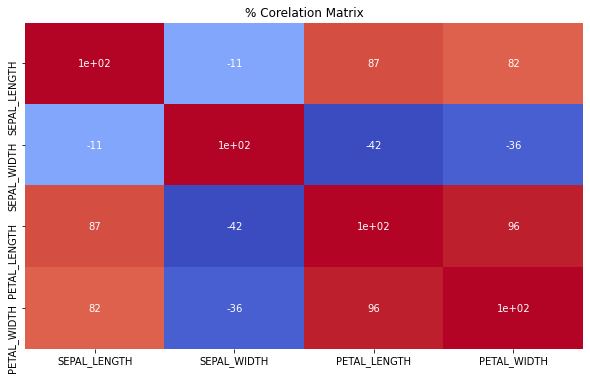

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(cbar=False,annot=True,data=data.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [ ]:
p=figure(plot_width=600,plot_height=600,title='Comparaison between Petal and Sepal Dimensions',x_axis_label='Sepal Dimension',y_axis_label='Petal Dimension')
x=data['SEPAL_LENGTH']
y=data['SEPAL_WIDTH']
z=data['PETAL_LENGTH']
k=data['PETAL_WIDTH']
p.circle(x,y,size=12,color='red',alpha=0.6)
p.square(z,k,size=12,color='navy',alpha=0.6)
output_notebook()
show(p)


In [24]:

data=data[['SEPAL_LENGTH','SEPAL_WIDTH','PETAL_LENGTH','PETAL_WIDTH','FLOWER']]
X=data.drop("FLOWER",axis=1)
y=data.FLOWER

# Modélisation

In [27]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 120,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(30, 4) (120, 4) (30,) (120,)


C:\Users\theop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\theop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9666666666666667
0.9
{'C': 1}
0.9333333333333333


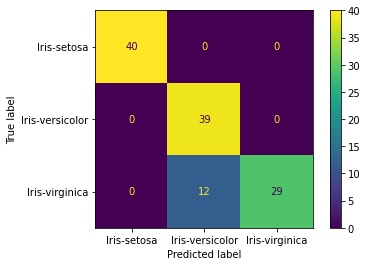

In [28]:
lm=LogisticRegression()
C_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
modele_lm= GridSearchCV(LogisticRegression(),C_values,scoring="accuracy",cv=5)
modele=modele_lm.fit(X_train,y_train)
y_pred = modele.predict(X_test)
print(modele.score(X_train,y_train))
print(modele.score(X_test,y_test))

print(modele_lm.best_params_)
scoremodele1=modele_lm.best_score_
print(scoremodele1)

plot_confusion_matrix(modele,X_test,y_true=y_test)
joblib.dump(modele,"./modele_saved")
load_model=joblib.load("modele_saved")

0.9333333333333333
0.9166666666666666


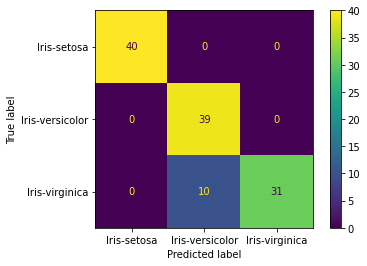

In [31]:
mvs = svm.SVC()
modele3 = mvs.fit(X_train,y_train)
print(modele3.score(X_train, y_train))
scoremodele3=modele3.score(X_test,y_test)
print(scoremodele3)
y_pred3 = modele.predict(X_test)
plot_confusion_matrix(modele3,X_test,y_true=y_test)

{'max_depth': 6, 'n_estimators': 50}
0.9666666666666668


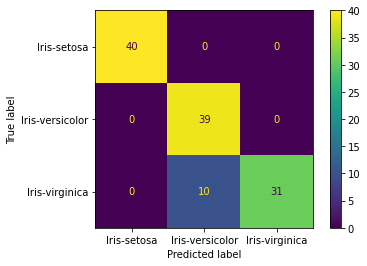

In [32]:
dico_param={"max_depth": list(range(2,10)), "n_estimators":[10,20,50,100]}
Grid_search= GridSearchCV(RandomForestClassifier(),dico_param,scoring="accuracy",cv=5)
Grid=Grid_search.fit(X_train,y_train)
y_pred4 = Grid.predict(X_test)
plot_confusion_matrix(Grid,X_test,y_true=y_test)

print(Grid_search.best_params_)
scoremodele4=Grid_search.best_score_
print(scoremodele4)

([<matplotlib.axis.XTick at 0x207dd3e2dc0>,
 [Text(0.0, 0, 'Logistic Regression'),
  Text(1.0, 0, 'Svm'),
  Text(2.0, 0, 'Grid Search')])

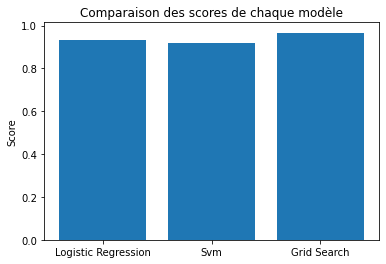

In [35]:
plt.bar(range(3),[scoremodele1,scoremodele3,scoremodele4])
plt.title("Comparaison des scores de chaque modèle")
plt.ylabel("Score")
x=np.linspace(0,2,3)
plt.xticks(x,["Logistic Regression","Svm","Grid Search"])

# Conclusion :#
The best model is grid_search!